In [4]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

In [3]:
# reading csv files
df =  pd.read_csv('adult.data', sep=",", header=None, skipinitialspace=True)
df2 = pd.read_csv('adult.test', sep=",", header=None, skipinitialspace=True)

# Join the data and test files together
df = pd.concat([df, df2])

# Shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

# Replace all of ? with None
df = df.replace(['?'], [None])

# Drop all rows with None in them
df = df.dropna(axis=0)

# Check no None values remain
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,20,Private,358355,9th,5,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K.
2,43,Self-emp-inc,133060,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,36,Private,186531,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K.
4,48,Private,39530,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
5,32,Private,426431,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K.


In [4]:
#Creating a copy of our data frame 
import copy
data = copy.deepcopy(df)
r = data.corr()
print(r)

#Adding column headers to our data 
data.columns = ["Age", "Workclass", "Fnlwgt", "Education", "Education-num", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Income"]


          0         2         4         10        11        12
0   1.000000 -0.075792  0.037623  0.079683  0.059351  0.101992
2  -0.075792  1.000000 -0.041993 -0.004110 -0.004349 -0.018679
4   0.037623 -0.041993  1.000000  0.126907  0.081711  0.146206
10  0.079683 -0.004110  0.126907  1.000000 -0.032102  0.083880
11  0.059351 -0.004349  0.081711 -0.032102  1.000000  0.054195
12  0.101992 -0.018679  0.146206  0.083880  0.054195  1.000000


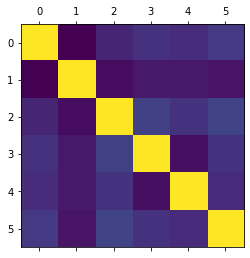

In [5]:
import matplotlib.pyplot as plt

plt.matshow(r)
plt.show()

In [6]:
#Education-num provides the information in terms of education level, therefore education column can be dropped 
del data["Education"]

In [7]:
#For the sake of correlation, the variables can be numerically encoded, however, when training algorithm, one-hot encoding must be used 

In [8]:
#Numerically encoding workclass

worklclass_mapping_dict = {
    "Private" : 0,
    "Self-emp-not-inc" : 1, 
    "Self-emp-inc" : 2, 
    "Federal-gov" : 3, 
    "Local-gov" : 4,
    "State-gov" : 5, 
    "Without-pay" : 6, 
    "Never-worked" : 7
}

data["Workclass"] = data["Workclass"].map(worklclass_mapping_dict)

In [9]:
#Numerically encoding marital status 

marital_status_mapping_dict = {
    "Married-civ-spouse" : 0, 
    "Divorced" : 1, 
    "Never-married" : 2, 
    "Widowed" : 3, 
    "Separated" :4, 
    "Married-spouse-absent" : 5, 
    "Married-AF-Spouse" : 6
}

data["Marital-status"] = data["Marital-status"].map(marital_status_mapping_dict)

In [10]:
#Numerically encoding occupation: Occupaiton is grouped into white collar and blue collar 
occupation_mapping_dict = {
    "Tech-support" : 0,
    "Craft-repair" : 1, 
    "Other-service" : 1, #Wasn't sure about blue or white collar for other services 
    "Sales" : 0, 
    "Exec-managerial" : 0, 
    "Prof-specialty" : 0, 
    "Handlers-cleaners" : 1, 
    "Machine-op-inspct" : 1, 
    "Adm-clerical" : 0, 
    "Farming-fishing" : 1, 
    "Transport-moving" : 1, 
    "Priv-house-serv" : 1, 
    "Protective-serv" : 1, 
    "Armed-Forces" : 1
    }

data["Occupation"] = data["Occupation"].map(occupation_mapping_dict)

In [11]:
#Numerically encoding the relationships 

relationship_mapping_dict = {
    "Wife" : 0, 
    "Own-child" : 1, 
    "Husband" : 2, 
    "Not-in-family" : 3, 
    "Other-relative" : 4, 
    "Unmarried" : 5
}

data["Relationship"] = data["Relationship"].map(relationship_mapping_dict)

In [12]:
#Numerically encoding the race variable 

race_mapping_dict = {
    "White" : 0,
    "Asian-Pac-Islander" : 1, 
    "Amer-Indian-Eskimo" : 2, 
    "Other" : 4, 
    "Black" : 5
    }

data["Race"] = data["Race"].map(race_mapping_dict)



In [13]:
#Numerically encoding the sex variable 

sex_mapping_dict = {
    "Male" : 0,
    "Female" : 1
    }

data["Sex"] = data["Sex"].map(sex_mapping_dict)

In [14]:
#Numerically encoding the native country variable 
country_mapping_dict = {
    "United-States" : 0,
    "Cambodia" :2,
    "England" : 3,
    "Puerto-Rico" : 0,
    "Canada" : 0, 
    "Germany" : 3, 
    "Outlying-US(Guam-USVI-etc)" : 0, 
    "India" : 2,
    "Japan" : 2, 
    "Greece" : 3, 
    "South" : 2, #assumes this was South Korea
    "China" : 2, 
    "Cuba" : 0, 
    "Iran" : 2,
    "Honduras" : 0,
    'Philippines' : 2, 
    'Italy' : 3,
    'Poland' : 3, 
    'Jamaica' : 0, 
    'Vietnam' : 2,
    'Mexico' : 0, 
    'Portugal' : 3, 
    'Ireland' : 3, 
    'France' : 3, 
    'Dominican-Republic' : 0, 
    'Laos' : 2, 
    'Ecuador' : 1,
    'Taiwan' : 2, 
    'Haiti' : 0,
    'Columbia' : 1, 
    'Hungary' : 3, 
    'Guatemala' : 0, 
    'Nicaragua' : 0, 
    'Scotland' : 3, 
    'Thailand' : 2, 
    'Yugoslavia' : 3, 
    'El-Salvador' : 0, 
    'Trinadad&Tobago' : 1, 
    'Peru' : 1, 
    'Hong' : 2, #This is assuming that Hong refers to Hong Kong
    'Holand-Netherlands' :3
}

data["Native-country"] = data["Native-country"].map(country_mapping_dict)

In [15]:
#Encoding income variable

income_mapping_dict = {
    "<=50K" : 0,
    ">50K" : 1, 
    "<=50K." : 0, 
    ">50K." : 1
    }

data["Income"] = data["Income"].map(income_mapping_dict)

In [16]:
#pandas data["column"].astype("uint8")

In [17]:
#Every variable should be numerically encoded, and ready to create a correlation matrix 
#This block will be used to figure out the correlation between variables once I figure out how to 
r = data.corr()

<AxesSubplot:>

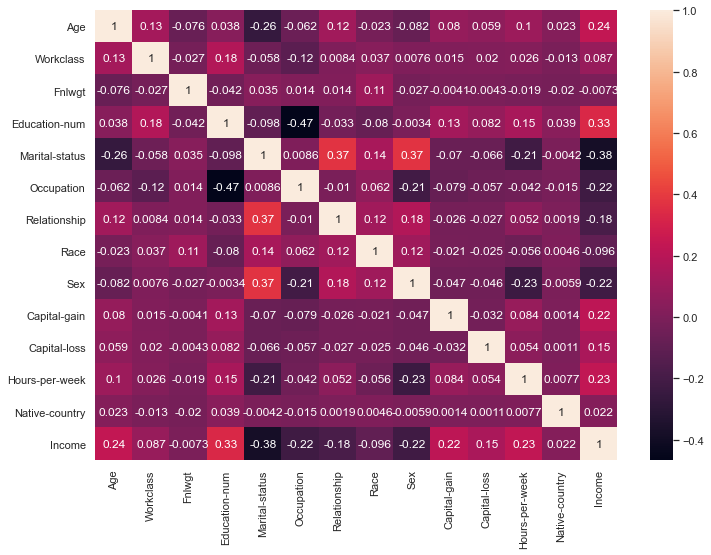

In [18]:
import seaborn as sns 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(r, annot=True)